In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('cleaned_financials.csv')
df.head(10)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,14227.586198,32370.0,16185.0,16185.0,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,14227.586198,26420.0,13210.0,13210.0,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,14227.586198,32670.0,21780.0,10890.0,2014-01-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,14227.586198,13320.0,8880.0,4440.0,2014-01-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,14227.586198,37050.0,24700.0,12350.0,2014-01-06
5,Government,Germany,Carretera,None,1513.0,3.0,350.0,529550.0,14227.586198,529550.0,393380.0,136170.0,2014-01-12
6,Midmarket,Germany,Montana,None,921.0,5.0,15.0,13815.0,14227.586198,13815.0,9210.0,4605.0,2014-01-03
7,Channel Partners,Canada,Montana,None,2518.0,5.0,12.0,30216.0,14227.586198,30216.0,7554.0,22662.0,2014-01-06
8,Government,France,Montana,None,1899.0,5.0,20.0,37980.0,14227.586198,37980.0,18990.0,18990.0,2014-01-06
9,Channel Partners,Germany,Montana,None,1545.0,5.0,12.0,18540.0,14227.586198,18540.0,4635.0,13905.0,2014-01-06


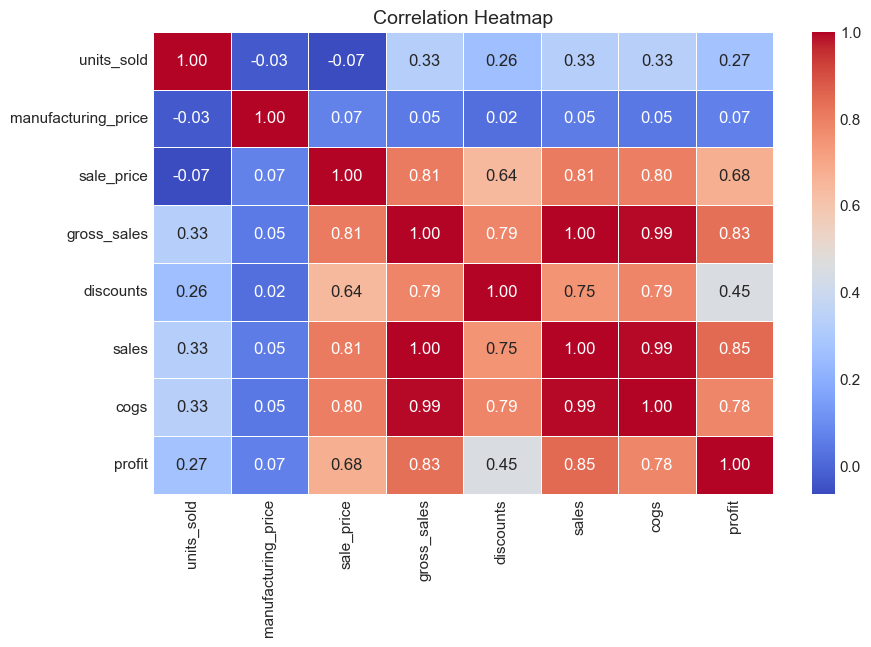

In [21]:
corr_matrix = df.corr(numeric_only=True)
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

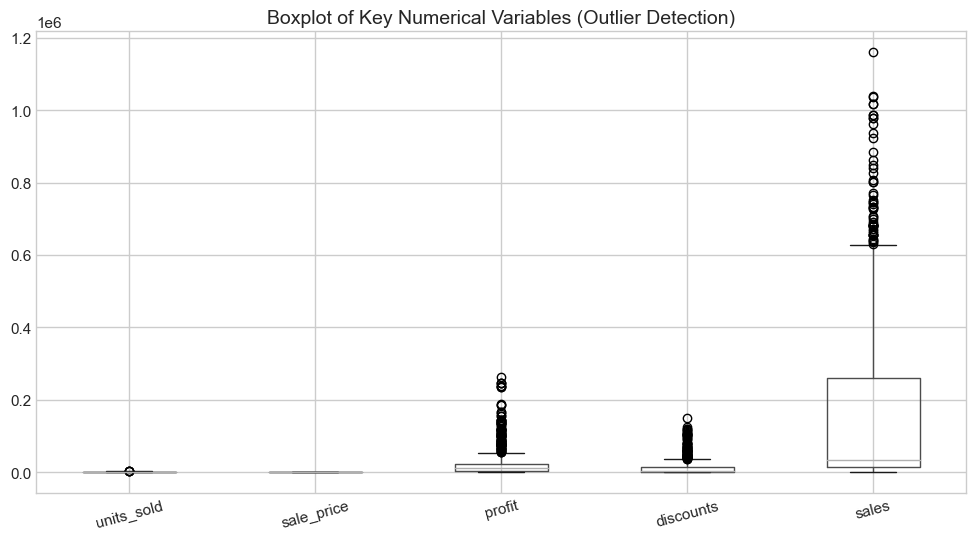

In [22]:
# Detect outliers using boxplots for key numerical columns
numeric_cols = ["units_sold", "sale_price", "profit", "discounts", "sales"]

plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=15)
plt.title("Boxplot of Key Numerical Variables (Outlier Detection)")
plt.show()

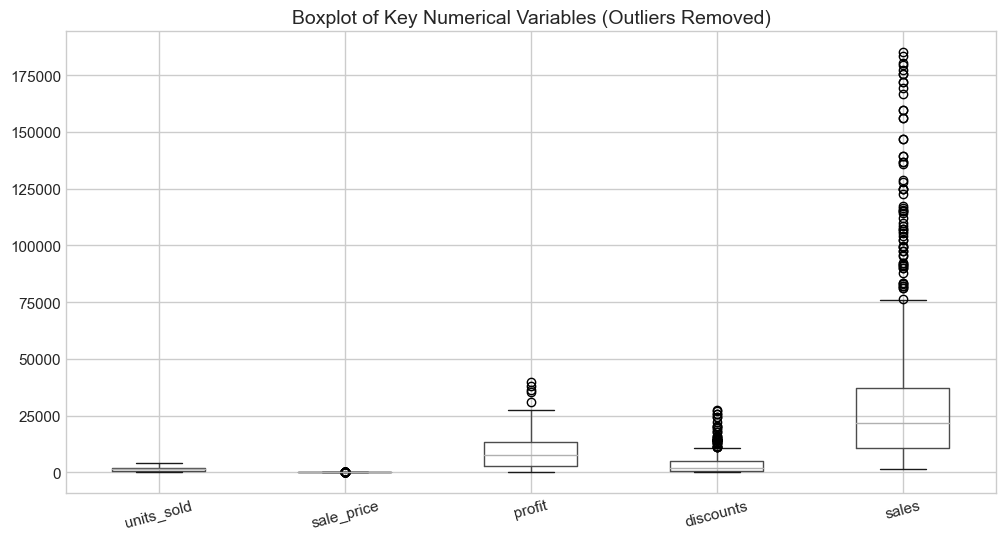

In [23]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


# Process outliers
columns_to_process = ["units_sold",
                      "sale_price", "profit", "discounts", "sales"]
df_cleaned = remove_outliers_iqr(df, columns_to_process)

# Draw boxplot again to confirm removal of outliers
plt.figure(figsize=(12, 6))
df_cleaned[numeric_cols].boxplot()
plt.xticks(rotation=15)
plt.title("Boxplot of Key Numerical Variables (Outliers Removed)")
plt.show()

/var/folders/nj/0lgf132j4fl1sxzx9tblphhr0000gn/T/ipykernel_75657/250816271.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


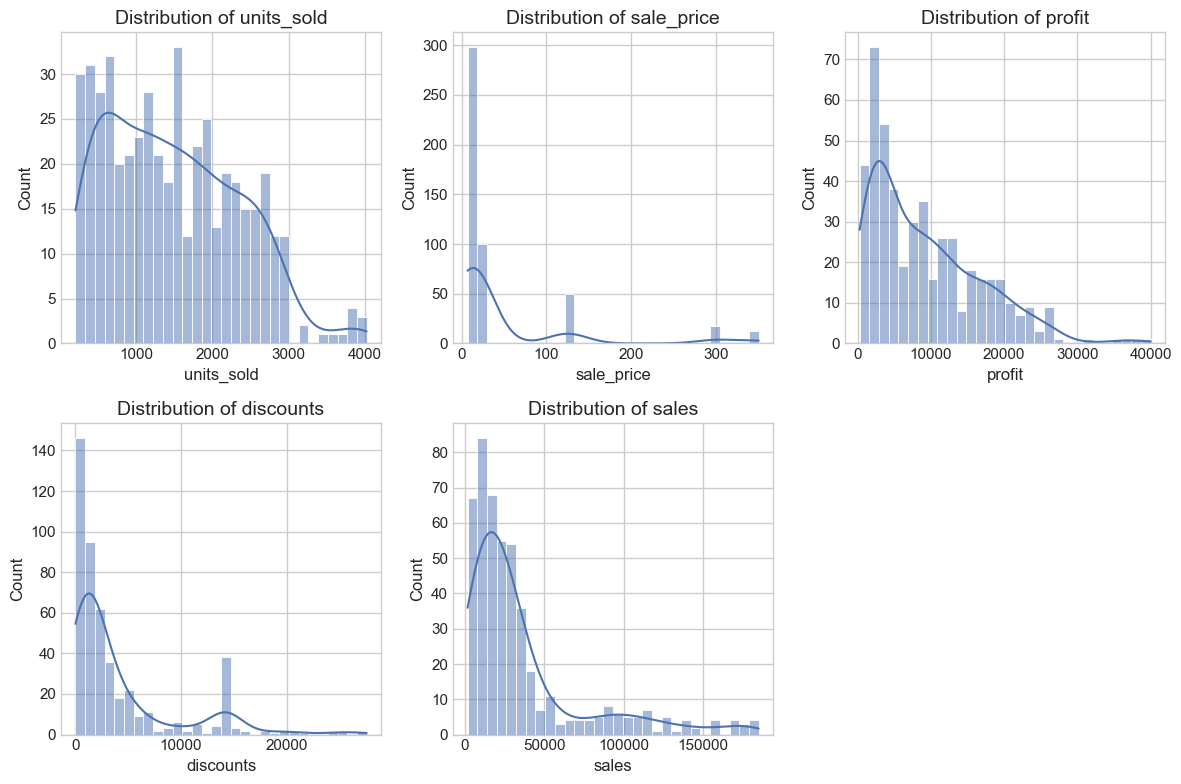

In [24]:
sns.set(style="whitegrid")
plt.style.use("seaborn-whitegrid")
plt.rcParams["font.size"] = 12  # Adjust font size
plt.rcParams["axes.titlesize"] = 14  # Title size
plt.rcParams["axes.labelsize"] = 12  # Label size

# Plot distributions for key numerical features in the cleaned dataset
numeric_cols = ["units_sold", "sale_price", "profit", "discounts", "sales"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ["units_sold", "sale_price", "discounts", "sales"]
target = "profit"

X = df_cleaned[features]
y = df_cleaned[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
{"R² Score": r2, "Root Mean Squared Error (RMSE)": rmse}

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'R² Score': 0.4158336721269369,
 'Root Mean Squared Error (RMSE)': 5952.21212126376}

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

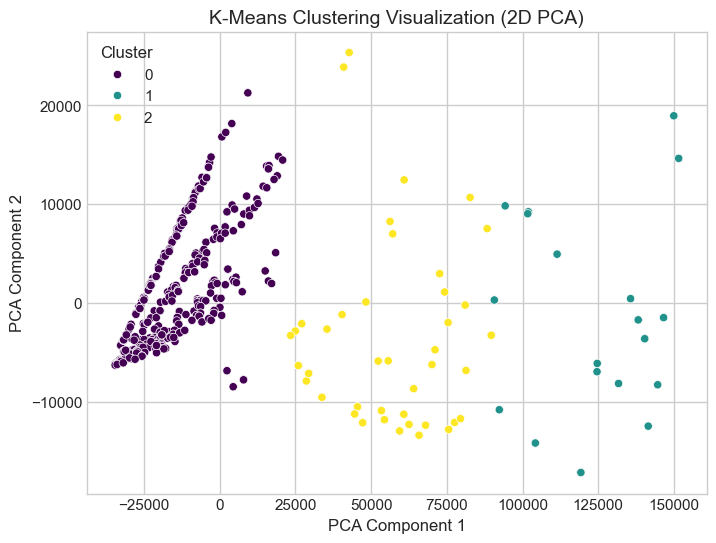

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select numerical features for clustering
cluster_features = ["units_sold", "sale_price", "profit", "discounts", "sales"]
X_cluster = df_cleaned[cluster_features]

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned["Cluster"] = kmeans.fit_predict(X_cluster)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
df_cleaned["PCA1"] = X_pca[:, 0]
df_cleaned["PCA2"] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["PCA1"], y=df_cleaned["PCA2"],
                hue=df_cleaned["Cluster"], palette="viridis")
plt.title("K-Means Clustering Visualization (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

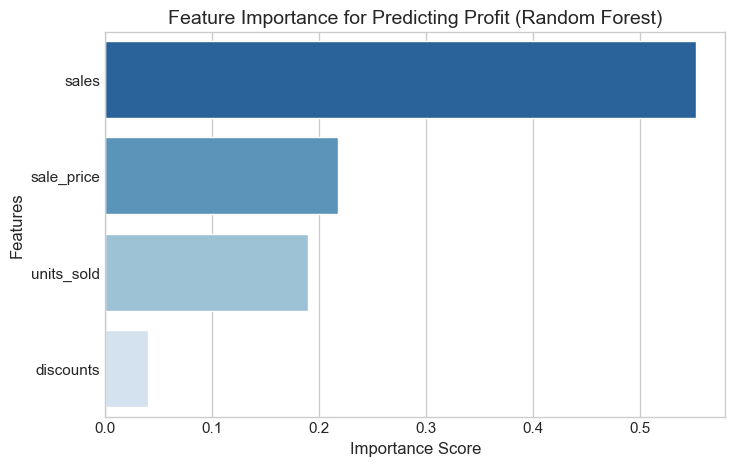

,Feature,Importance
3,sales,0.552159
1,sale_price,0.217884
0,units_sold,0.189672
2,discounts,0.040285


In [27]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a Random Forest model for feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_
feature_names = np.array(features)

# Create a sorted feature importance DataFrame
importance_df = (
    pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
    .sort_values(by="Importance", ascending=False)
)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Feature Importance for Predicting Profit (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Show sorted feature importance
importance_df